# EXPLORE SEDML

In [1]:
import libsbml
import os
import phrasedml
import tellurium as te
import tempfile

te.setDefaultPlottingEngine('matplotlib')

# Helpers

In [2]:
test_antimony_str = '''
model test_myModel
  S1 -> S2; k1*S1
  S2 -> S1; k2*S2
  S1 = 10; S2 = 0
  k1 = 1
  k2 = 2
end
'''
MODEL_FILE = "/tmp/test_myModel"
sbml_str = te.antimonyToSBML(test_antimony_str)
with open(MODEL_FILE, 'w') as f:
    f.writelines(sbml_str)

In [3]:
def makeSBMLFile(antimony_str:str, filename:str)->str:
    path = os.path.join("/tmp", filename)
    sbml_str = te.antimonyToSBML(antimony_str)
    with open(path, 'w') as f:
        f.writelines(sbml_str)
    return path

# Tests
path = makeSBMLFile(test_antimony_str, "test_file")
assert(os.path.exists(path))
print("OK!")

OK!


In [4]:
def execute(phrasedml_str:str):
    """
    Executes a phrasedml string
    """
    sedml_str = phrasedml.convertString(phrasedml_str)
    if sedml_str is None:
        print(phrasedml.getLastError())
        df = None
    else:
        te.executeSEDML(sedml_str)
        df = te.getLastReport()
    return df

# Tests
#execute(phrasedml_str)

# phrasedml basics

In [5]:
antimony_str = '''
model myModel
  S1 -> S2; k1*S1
  S2 -> S1; k2*S2
  S1 = 10; S2 = 0
  k1 = 1
  k2 = 2
end
'''
MODEL_FILE = "/tmp/myModel"
sbml_str = te.antimonyToSBML(antimony_str)
with open(MODEL_FILE, 'w') as f:
    f.writelines(sbml_str)

In [6]:
rr = te.loada(antimony_str)

In [7]:
phrasedml_str = '''
  model1 = model "/tmp/myModel" with k1 =5;
  model2 = model model1 with k1 =6
  sim1 = simulate uniform(0, 5, 100)
  task1 = run sim1 on model1
  plot "Figure 2" time vs S1, S2
'''

<?xml version="1.0" encoding="UTF-8"?>
<!-- Created by phraSED-ML version v1.3.0 with libSBML version 5.19.5. -->
<sedML xmlns="http://sed-ml.org/sed-ml/level1/version4" xmlns:sbml="http://www.sbml.org/sbml/level3/version2/core" level="1" version="4">
  <listOfModels>
    <model id="model1" language="urn:sedml:language:sbml.level-3.version-2" source="/tmp/myModel">
      <listOfChanges>
        <changeAttribute target="/sbml:sbml/sbml:model/sbml:listOfParameters/sbml:parameter[@id='k1']/@value" newValue="5"/>
      </listOfChanges>
    </model>
    <model id="model2" language="urn:sedml:language:sbml.level-3.version-2" source="model1">
      <listOfChanges>
        <changeAttribute target="/sbml:sbml/sbml:model/sbml:listOfParameters/sbml:parameter[@id='k1']/@value" newValue="6"/>
      </listOfChanges>
    </model>
  </listOfModels>
  <listOfSimulations>
    <uniformTimeCourse id="sim1" initialTime="0" outputStartTime="0" outputEndTime="5" numberOfSteps="100">
      <algorithm name="CV

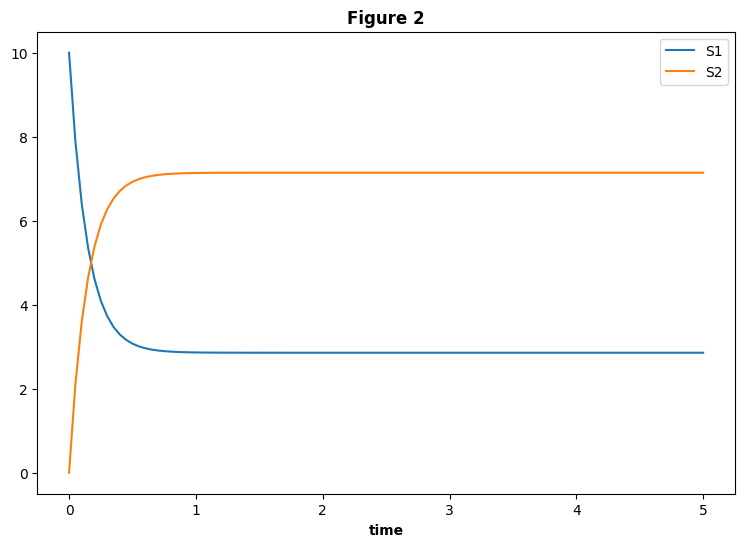

In [8]:
#plot "Figure 1" time vs S1, S2

# create the sedml xml string from the phrasedml
#sbml_str = te.antimonyToSBML(antimony_str)
phrasedml.setReferencedSBML(MODEL_FILE, sbml_str)

sedml_str = phrasedml.convertString(phrasedml_str)
if sedml_str == None:
    print(phrasedml.getLastError())
print(sedml_str)
te.executeSEDML(sedml_str)

# Tasks for SimpleSEDML

1. Run a simulation with changed parameter values
2. Parameter scan
3. Compare the output from two different models
4. Compare simulation results with data

# Repeated tasks in phrasedml

SBML written to temporary file


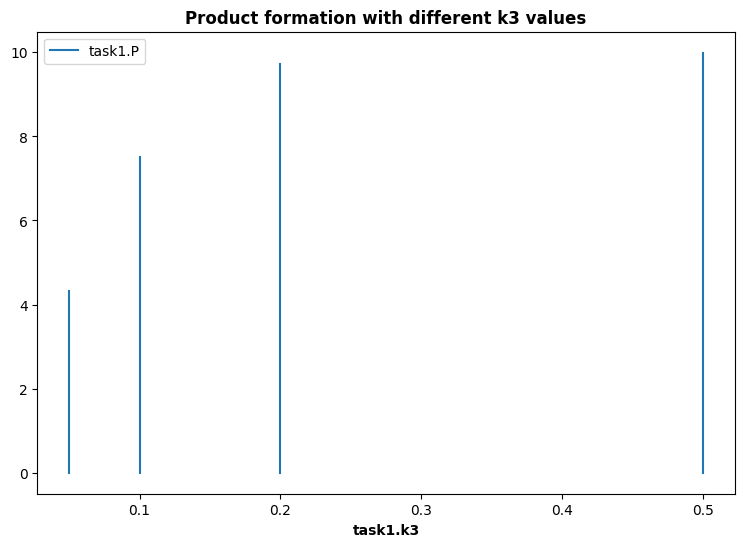

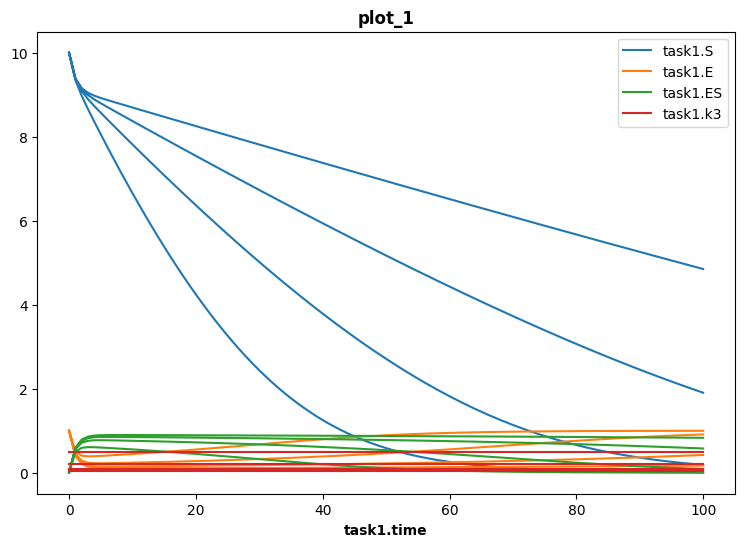

In [9]:
import tellurium as te
import phrasedml

# Define model with Antimony
antimony_str = '''

model anotherModel
   A -> B; 1
   A = 10
   B = 1
end

model enzymeKinetics
    // Compartment
    compartment C = 1.0;
    
    // Species
    species S in C = 10.0;
    species E in C = 1.0;
    species ES in C = 0.0;
    species P in C = 0.0;
    
    // Reactions
    J1: S + E -> ES; k1*S*E;
    J2: ES -> S + E; k2*ES;
    J3: ES -> P + E; k3*ES;
    
    // Parameters
    k1 = 0.1;
    k2 = 0.05;
    k3 = 0.1;
end
'''

# Convert to SBML
sbml_str = te.antimonyToSBML(antimony_str)

# Define PhraSEDML with repeated tasks for parameter sweep
phrasedml_str = '''
    // Reference the model
    model1 = model "enzymeKinetics"
    
    // Define base simulation
    sim1 = simulate uniform(0, 100, 100)
    sim1 = simulate steadystate
    
    // Define base task
    task0 = run sim1 on model1
    
    // Define repeated task - vary k3 parameter
    task1 = repeat task0 for k3 in [0.05, 0.1, 0.2, 0.5], reset=true
    
    // Plot results
    plot "Product formation with different k3 values" task1.k3 vs task1.P
    // Add model variable and parameter for reference in the legend
    plot task1.time vs task1.S, task1.E, task1.ES, task1.k3
'''


workingDir = tempfile.mkdtemp(suffix="_sedml")

sbml_file = os.path.join(workingDir, 'enzymeKinetics')
sedml_file = os.path.join(workingDir, 'sed_main.xml')

with open(sbml_file, 'wb') as f:
    f.write(sbml_str.encode('utf-8'))
    f.flush()
    print('SBML written to temporary file')

# Set model reference
phrasedml.setReferencedSBML("enzymeKinetics", sbml_str)

# Convert to SED-ML
sedml_str = phrasedml.convertString(phrasedml_str)

# Execute simulation
if sedml_str:
    te.executeSEDML(sedml_str, workingDir=workingDir)
else:
    print(phrasedml.getLastPhrasedError())

In [10]:
?phrasedml.convertString

Signature: phrasedml.convertString(model)
Docstring:
Convert a model string from phraSEDML to SEDML, or visa versa.  If NULL is returned, an error occurred, which can be retrieved with
@if python
getLastError().
@else
getLastPhrasedError().
@endif

@return The converted model, as a string.

@param model the model as a character string.  May be either SED-ML or phraSED-ML.

@if python
@see getLastError()
@else
@see getLastPhrasedError()
@endif
File:      ~/home/Technical/repos/SimpleSEDML/ssed/lib/python3.9/site-packages/phrasedml/phrasedml.py
Type:      function

In [11]:
!ls -l /var/folders/02/lb248q1j50dch2pthzkvxmpr0000gn/T/tmp1zug2qoa_sedml

ls: /var/folders/02/lb248q1j50dch2pthzkvxmpr0000gn/T/tmp1zug2qoa_sedml: No such file or directory


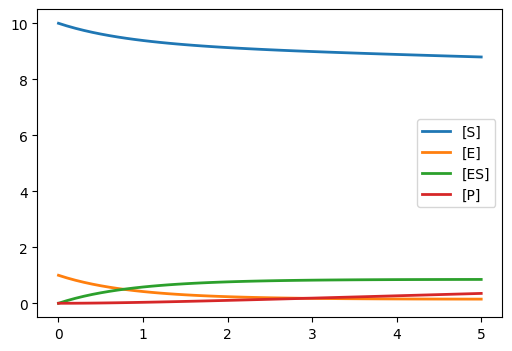

In [12]:
rr = te.loadSBMLModel(sbml_str)
rr.simulate()
rr.plot()

In [13]:
print(phrasedml_str)


    // Reference the model
    model1 = model "enzymeKinetics"
    
    // Define base simulation
    sim1 = simulate uniform(0, 100, 100)
    sim1 = simulate steadystate
    
    // Define base task
    task0 = run sim1 on model1
    
    // Define repeated task - vary k3 parameter
    task1 = repeat task0 for k3 in [0.05, 0.1, 0.2, 0.5], reset=true
    
    // Plot results
    plot "Product formation with different k3 values" task1.k3 vs task1.P
    // Add model variable and parameter for reference in the legend
    plot task1.time vs task1.S, task1.E, task1.ES, task1.k3



In [14]:
print(sedml_str)

<?xml version="1.0" encoding="UTF-8"?>
<!-- Created by phraSED-ML version v1.3.0 with libSBML version 5.19.5. -->
<sedML xmlns="http://sed-ml.org/sed-ml/level1/version4" xmlns:sbml="http://www.sbml.org/sbml/level3/version2/core" level="1" version="4">
  <listOfModels>
    <model id="model1" language="urn:sedml:language:sbml.level-3.version-2" source="enzymeKinetics"/>
  </listOfModels>
  <listOfSimulations>
    <uniformTimeCourse id="sim1" initialTime="0" outputStartTime="0" outputEndTime="100" numberOfSteps="100">
      <algorithm name="CVODE" kisaoID="KISAO:0000019"/>
    </uniformTimeCourse>
    <steadyState id="sim1">
      <algorithm name="steady state method" kisaoID="KISAO:0000407"/>
    </steadyState>
  </listOfSimulations>
  <listOfTasks>
    <task id="task0" modelReference="model1" simulationReference="sim1"/>
    <repeatedTask id="task1" range="vector_for_k3" resetModel="true">
      <listOfRanges>
        <vectorRange id="vector_for_k3">
          <value> 0.05 </value>
    

# Using Phrasedml generated from Claude

In [15]:
!ls /Users/jlheller/home/Technical/repos/SBMLModel/data/*206*

/Users/jlheller/home/Technical/repos/SBMLModel/data/BIOMD0000000206.xml


In [16]:
# Step 1: Reference the model
phrasedml.setWorkingDirectory("/Users/jlheller/home/Technical/repos/SBMLModel/data")
phrasedml_str = """
model1 = model "BIOMD0000000206.xml"
sim1 = simulate uniform(0, 10, 100)  # 0 to 10 seconds with 100 time points
task1 = run sim1 on model1
plot "BioModel 206 Simulation" time vs s1, s5
"""

In [17]:
phrasedml_str = phrasedml.convertString(phrasedml_str)
if len(phrasedml.getLastError()) > 0:
    print(phrasedml.getLastError())

# Source is HTTP

In [18]:
URL = "https://www.ebi.ac.uk/biomodels/services/download/get-files/MODEL3352181362/3/BIOMD0000000206_url.xml"
MODEL = "Wolf2000_Glycolytic_Oscillations"

In [19]:
rr = te.loadSBMLModel(URL)
wolf_sbml_str = rr.getSBML()

In [20]:
phrasedml_str = '''
  model1 = model "/tmp/myModel"
  sim1 = simulate uniform(0, 10, 100); sim1.algorithm=CVODE
  task1 = run sim1 on model1
  plot "Figure 2" time vs S1, S2
'''

In [21]:
print(phrasedml_str)


  model1 = model "/tmp/myModel"
  sim1 = simulate uniform(0, 10, 100); sim1.algorithm=CVODE
  task1 = run sim1 on model1
  plot "Figure 2" time vs S1, S2



In [22]:
# create the sedml xml string from the phrasedml
phrasedml.setReferencedSBML(MODEL, URL)

sedml_str = phrasedml.convertString(phrasedml_str)
if sedml_str == None:
    print(phrasedml.getLastError())
print(sedml_str)

<?xml version="1.0" encoding="UTF-8"?>
<!-- Created by phraSED-ML version v1.3.0 with libSBML version 5.19.5. -->
<sedML xmlns="http://sed-ml.org/sed-ml/level1/version4" xmlns:sbml="http://www.sbml.org/sbml/level3/version2/core" level="1" version="4">
  <listOfModels>
    <model id="model1" language="urn:sedml:language:sbml.level-3.version-2" source="/tmp/myModel"/>
  </listOfModels>
  <listOfSimulations>
    <uniformTimeCourse id="sim1" initialTime="0" outputStartTime="0" outputEndTime="10" numberOfSteps="100">
      <algorithm name="CVODE" kisaoID="KISAO:0000019"/>
    </uniformTimeCourse>
  </listOfSimulations>
  <listOfTasks>
    <task id="task1" modelReference="model1" simulationReference="sim1"/>
  </listOfTasks>
  <listOfDataGenerators>
    <dataGenerator id="plot_0_0_0" name="time">
      <math xmlns="http://www.w3.org/1998/Math/MathML">
        <ci> time </ci>
      </math>
      <listOfVariables>
        <variable id="time" symbol="urn:sedml:symbol:time" taskReference="task1"

# Report

## Simple report

In [23]:
antimony_str = '''
model myModel
  S1 -> S2; k1*S1
  S1 = 10; S2 = 0
  k1 = 1
end
'''

In [24]:
# FIXME: Must be written as bytes
sbml_str = te.antimonyToSBML(antimony_str)
with open("/tmp/myModel", 'wb') as f:
        f.write(sbml_str.encode('utf-8'))
        f.flush()
        print('SBML written to temporary file')

SBML written to temporary file


In [25]:
# repeated_task = repeat task1 for k1 in [1, 3, 5], reset=true
phrasedml_str = '''
  model1 = model "/tmp/myModel"
  sim1 = simulate uniform(0, 5, 100)
  task1 = run sim1 on model1
  //report task1.time, task1.S1, task1.S2
  report "Concentration over Time" time, S1, S2
'''

In [26]:
#plot "Figure 1" time vs S1, S2

# create the sedml xml string from the phrasedml
#phrasedml.setReferencedSBML("/tmp/myModel", sbml_str)

sedml_str = phrasedml.convertString(phrasedml_str)
if sedml_str == None:
    print(phrasedml.getLastError())
else:
    print(sedml_str)
    phrasedml.setWorkingDirectory(os.getcwd())
    te.executeSEDML(sedml_str)
    print(te.getLastReport())

<?xml version="1.0" encoding="UTF-8"?>
<!-- Created by phraSED-ML version v1.3.0 with libSBML version 5.19.5. -->
<sedML xmlns="http://sed-ml.org/sed-ml/level1/version4" xmlns:sbml="http://www.sbml.org/sbml/level3/version2/core" level="1" version="4">
  <listOfModels>
    <model id="model1" language="urn:sedml:language:sbml.level-3.version-2" source="/tmp/myModel"/>
  </listOfModels>
  <listOfSimulations>
    <uniformTimeCourse id="sim1" initialTime="0" outputStartTime="0" outputEndTime="5" numberOfSteps="100">
      <algorithm name="CVODE" kisaoID="KISAO:0000019"/>
    </uniformTimeCourse>
  </listOfSimulations>
  <listOfTasks>
    <task id="task1" modelReference="model1" simulationReference="sim1"/>
  </listOfTasks>
  <listOfDataGenerators>
    <dataGenerator id="report_0_0_0" name="time">
      <math xmlns="http://www.w3.org/1998/Math/MathML">
        <ci> time </ci>
      </math>
      <listOfVariables>
        <variable id="time" symbol="urn:sedml:symbol:time" taskReference="task1

In [27]:
dir(te)

['DumpJSONInfo',
 'LatexExport',
 'ParameterEstimation',
 'ParameterScan',
 'ParameterScan2D',
 'SBMLDiagram',
 'SensitivityAnalysis',
 'SteadyStateScan',
 'StochasticSimulationModel',
 'UncertaintyAllP',
 'UncertaintySingleP',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__set_model',
 '__spec__',
 '__version__',
 '__warningregistry__',
 'absolute_import',
 'addFileToCombineArchive',
 'addFilesToCombineArchive',
 'analysis',
 'antimonyConverter',
 'antimonyToCellML',
 'antimonyToSBML',
 'cellmlToAntimony',
 'cellmlToSBML',
 'clearTiledFigure',
 'convertAndExecuteCombineArchive',
 'convertCombineArchive',
 'createCombineArchive',
 'disablePlotting',
 'distributed_parameter_scanning',
 'distributed_sensitivity_analysis',
 'distributed_stochastic_simulation',
 'executeCombineArchive',
 'executeInlineOmex',
 'executeInlineOmexFromFile',
 'executeSEDML',
 'exportInlineOmex',
 'extractFileFromCombineArchive',
 'getAppDir

In [28]:
?te.experiment

Object `te.experiment` not found.


## Repeated task

In [29]:
# repeated_task = repeat task1 for k1 in [1, 3, 5], reset=true
phrasedml_str = '''
  model1 = model "/tmp/myModel"
  sim1 = simulate uniform(0, 5, 100)
  task1 = run sim1 on model1
  repeated_task1 = repeat task1 for k1 in [1, 3, 5], reset=True
  report repeated_task1.time, repeated_task1.S1, repeated_task1.S2
'''

In [30]:
#plot "Figure 1" time vs S1, S2

# create the sedml xml string from the phrasedml
#phrasedml.setReferencedSBML("/tmp/myModel", sbml_str)

sedml_str = phrasedml.convertString(phrasedml_str)
if sedml_str == None:
    print(phrasedml.getLastError())
else:
    print(sedml_str)
    te.executeSEDML(sedml_str)
    print(te.getLastReport())

<?xml version="1.0" encoding="UTF-8"?>
<!-- Created by phraSED-ML version v1.3.0 with libSBML version 5.19.5. -->
<sedML xmlns="http://sed-ml.org/sed-ml/level1/version4" xmlns:sbml="http://www.sbml.org/sbml/level3/version2/core" level="1" version="4">
  <listOfModels>
    <model id="model1" language="urn:sedml:language:sbml.level-3.version-2" source="/tmp/myModel"/>
  </listOfModels>
  <listOfSimulations>
    <uniformTimeCourse id="sim1" initialTime="0" outputStartTime="0" outputEndTime="5" numberOfSteps="100">
      <algorithm name="CVODE" kisaoID="KISAO:0000019"/>
    </uniformTimeCourse>
  </listOfSimulations>
  <listOfTasks>
    <task id="task1" modelReference="model1" simulationReference="sim1"/>
    <repeatedTask id="repeated_task1" range="vector_for_k1" resetModel="true">
      <listOfRanges>
        <vectorRange id="vector_for_k1">
          <value> 1 </value>
          <value> 3 </value>
          <value> 5 </value>
        </vectorRange>
      </listOfRanges>
      <listOfCha

# Parameter Scan

In [31]:
phrasedml_str = '''
  model_3 = model "/tmp/myModel"
  sim_repeat = simulate onestep(3)
  task_1 = run sim_repeat on model_3
  #repeatedtask_1 = repeat task_1 for k1 in [0.1, 5, 6, 1], k2 in [0.1, 1], reset=true
  repeatedtask_1 = repeat task_1 for k1 in [0.1, 5, 6, 1], reset=true
  plot repeatedtask_1.k1 vs repeatedtask_1.S1, repeatedtask_1.S2
  # plot repeatedtask_1.k2 vs repeatedtask_1.S1, repeatedtask_1.S2
  report repeatedtask_1.k1, repeatedtask_1.S1, repeatedtask_1.S2
'''

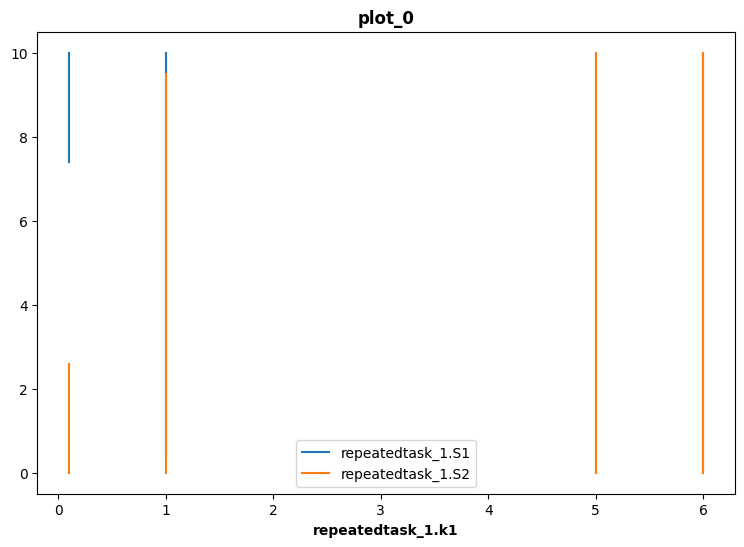

In [32]:
sedml_str = phrasedml.convertString(phrasedml_str)
if sedml_str is None:
    print(phrasedml.getLastError())
te.executeSEDML(sedml_str)

# Plots

In [33]:
SBML_FILE = '/tmp/myModel.xml'
antimony_str = '''
model myModel
  S1 -> S2; k1*S1
  S2 -> S3; k2*S2
  S1 = 10; S2 = 0; S3 = 0;
  k1 = 1
  k2 = 1
end
'''
sbml_str = te.antimonyToSBML(antimony_str)
with open(SBML_FILE, 'wb') as f:
        f.write(sbml_str.encode('utf-8'))
        f.flush()

In [34]:
phrasedml_str = '''
model1 = model "/tmp/myModel"
sim1 = simulate uniform(0, 10, 100)
task1 = run sim1 on model1
repeatedTask1 = repeat task1 for k1 in [0.1, 0.5, 1.0], k2 in [0.05, 0.1, 0.2], reset=true
//plot "Substrate Dynamics" repeatedTask1.time vs repeatedTask1.S1
plot "My plot" repeatedTask1.time
'''

In [35]:
sedml_str = phrasedml.convertString(phrasedml_str)
if sedml_str == None:
    print(phrasedml.getLastError())
else:
    #print(sedml_str)
    te.executeSEDML(sedml_str)

Unable to parse line 7 ('plot repeatedTask1_____time'): can only create plots of two or three dimensions, not one.  Use 'report' instead of 'plot' to output one-dimensional data, or use 'vs' to distinguish axes in 2D or 3D data ('plot S1 vs S2').


# Steady State

In [36]:
antimony_str = '''
model myModel
  S1 -> S2; k1*S1
  S2 -> S1; k2*S2
  S1 = 10; S2 = 0
  k1 = 1
  k2 = 2
end
'''
MODEL_FILE = "/tmp/my_model.xml"
sbml_str = te.antimonyToSBML(antimony_str)
with open(MODEL_FILE, 'w') as f:
    f.writelines(sbml_str)

In [37]:
phrasedml_str = '''
  model1 = model "%s" with k1 =6
  sim1 = simulate steadystate
  task1 = run sim1 on model1
  report S1, S2
''' % MODEL_FILE
print(phrasedml_str)


  model1 = model "/tmp/my_model.xml" with k1 =6
  sim1 = simulate steadystate
  task1 = run sim1 on model1
  report S1, S2



In [38]:
sedml_str = phrasedml.convertString(phrasedml_str)
if sedml_str is None:
    print(phrasedml.getLastError())
else:
    print(sedml_str)

<?xml version="1.0" encoding="UTF-8"?>
<!-- Created by phraSED-ML version v1.3.0 with libSBML version 5.19.5. -->
<sedML xmlns="http://sed-ml.org/sed-ml/level1/version4" xmlns:sbml="http://www.sbml.org/sbml/level3/version2/core" level="1" version="4">
  <listOfModels>
    <model id="model1" language="urn:sedml:language:sbml.level-3.version-2" source="/tmp/my_model.xml">
      <listOfChanges>
        <changeAttribute target="/sbml:sbml/sbml:model/sbml:listOfParameters/sbml:parameter[@id='k1']/@value" newValue="6"/>
      </listOfChanges>
    </model>
  </listOfModels>
  <listOfSimulations>
    <steadyState id="sim1">
      <algorithm name="steady state method" kisaoID="KISAO:0000407"/>
    </steadyState>
  </listOfSimulations>
  <listOfTasks>
    <task id="task1" modelReference="model1" simulationReference="sim1"/>
  </listOfTasks>
  <listOfDataGenerators>
    <dataGenerator id="report_0_0_0" name="S1">
      <math xmlns="http://www.w3.org/1998/Math/MathML">
        <ci> S1 </ci>
      

In [39]:
te.executeSEDML(sedml_str)
te.getLastReport()

,S1,S2
0,2.5,7.5


## Steady State Bug

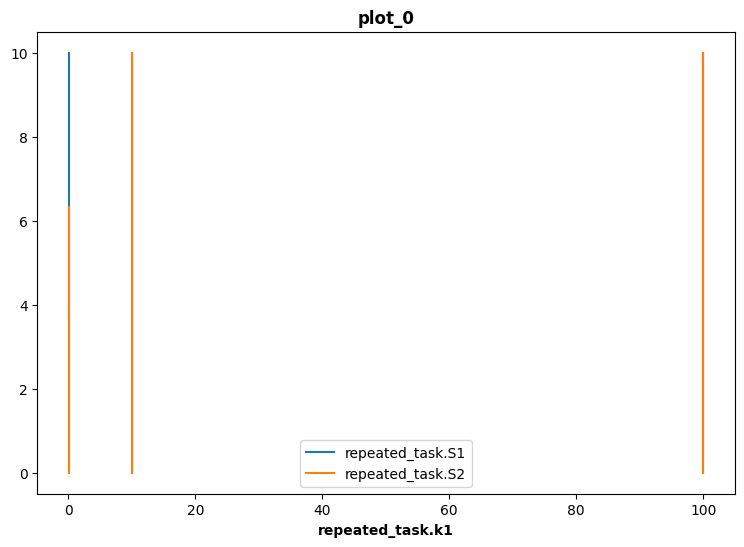

In [40]:
def makeSBMLFile(antimony_str:str, filename:str)->str:
    path = os.path.join("/tmp", filename)
    sbml_str = te.antimonyToSBML(antimony_str)
    with open(path, 'w') as f:
        f.writelines(sbml_str)
    return path

MODEL = """
model myModel
    S1 -> S2; k1*S1

    S1 is "species 1";

    k1 = 0.1
    S1 = 10
    S2 = 0
end
"""
SBML_FILE = makeSBMLFile(MODEL, "ss_bug.xml")

# Construct phrasedml
phrasedml_str = '''
mod1 = model "/tmp/ss_bug.xml" 
sim1 = simulate onestep(10)
subtask = run sim1 on mod1
repeated_task = repeat subtask for k1 in [0.1, 10, 100], reset=true
plot repeated_task.k1 vs repeated_task.S1, repeated_task.S2
'''

# Execute the PhraSEDML
workingDir = "/tmp"
# Convert to SED-ML
sedml_str = phrasedml.convertString(phrasedml_str)
if sedml_str is None:
    print(phrasedml.getLastError())
else:
    te.executeSEDML(sedml_str, workingDir=workingDir)

In [41]:
print(sedml_str)

<?xml version="1.0" encoding="UTF-8"?>
<!-- Created by phraSED-ML version v1.3.0 with libSBML version 5.19.5. -->
<sedML xmlns="http://sed-ml.org/sed-ml/level1/version4" xmlns:sbml="http://www.sbml.org/sbml/level3/version2/core" level="1" version="4">
  <listOfModels>
    <model id="mod1" language="urn:sedml:language:sbml.level-3.version-2" source="/tmp/ss_bug.xml"/>
  </listOfModels>
  <listOfSimulations>
    <oneStep id="sim1" step="10">
      <algorithm name="CVODE" kisaoID="KISAO:0000019"/>
    </oneStep>
  </listOfSimulations>
  <listOfTasks>
    <task id="subtask" modelReference="mod1" simulationReference="sim1"/>
    <repeatedTask id="repeated_task" range="vector_for_k1" resetModel="true">
      <listOfRanges>
        <vectorRange id="vector_for_k1">
          <value> 0.1 </value>
          <value> 10 </value>
          <value> 100 </value>
        </vectorRange>
      </listOfRanges>
      <listOfChanges>
        <setValue modelReference="mod1" target="/sbml:sbml/sbml:model/sbm

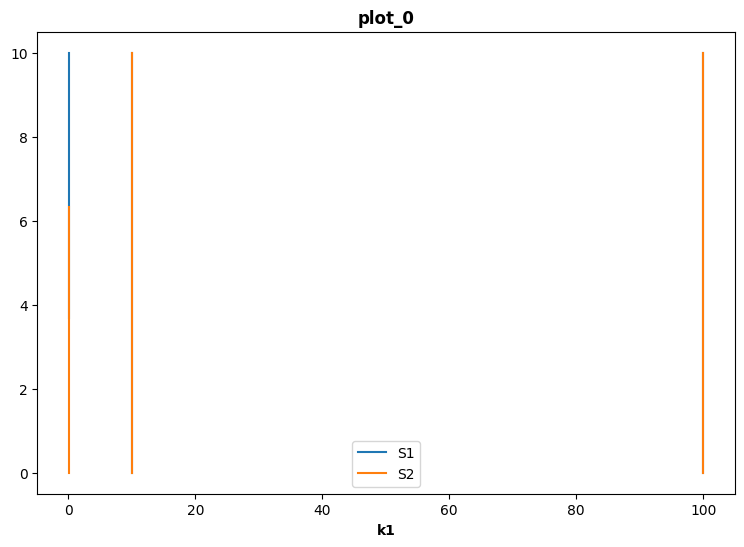

In [42]:
new_sedml_str = """
<?xml version="1.0" encoding="UTF-8"?>
<!-- Created by phraSED-ML version v1.3.0 with libSBML version 5.19.5. -->
<sedML xmlns="http://sed-ml.org/sed-ml/level1/version4" xmlns:sbml="http://www.sbml.org/sbml/level3/version2/core" level="1" version="4">
  <listOfModels>
    <model id="mod1" language="urn:sedml:language:sbml.level-3.version-2" source="/tmp/ss_bug.xml"/>
  </listOfModels>
  <listOfSimulations>
    <oneStep id="sim1" step="10">
      <algorithm name="CVODE" kisaoID="KISAO:0000019"/>
    </oneStep>
  </listOfSimulations>
  <listOfTasks>
    <task id="subtask" modelReference="mod1" simulationReference="sim1"/>
    <repeatedTask id="repeated_task" range="vector_for_k1" resetModel="true">
      <listOfRanges>
        <vectorRange id="vector_for_k1">
          <value> 0.1 </value>
          <value> 10 </value>
          <value> 100 </value>
        </vectorRange>
      </listOfRanges>
      <listOfChanges>
        <setValue modelReference="mod1" target="/sbml:sbml/sbml:model/sbml:listOfParameters/sbml:parameter[@id='k1']" range="vector_for_k1">
          <math xmlns="http://www.w3.org/1998/Math/MathML">
            <ci> vector_for_k1 </ci>
          </math>
        </setValue>
      </listOfChanges>
      <listOfSubTasks>
        <subTask order="0" task="subtask"/>
      </listOfSubTasks>
    </repeatedTask>
  </listOfTasks>
  <listOfDataGenerators>
    <dataGenerator id="plot_0_0_0" name="k1">
      <math xmlns="http://www.w3.org/1998/Math/MathML">
        <ci> repeated_task_____k1 </ci>
      </math>
      <listOfVariables>
        <variable id="repeated_task_____k1" target="/sbml:sbml/sbml:model/sbml:listOfParameters/sbml:parameter[@id='k1']" taskReference="repeated_task" modelReference="mod1"/>
      </listOfVariables>
    </dataGenerator>
    <dataGenerator id="plot_0_0_1" name="S1">
      <math xmlns="http://www.w3.org/1998/Math/MathML">
        <ci> repeated_task_____S1 </ci>
      </math>
      <listOfVariables>
        <variable id="repeated_task_____S1" target="/sbml:sbml/sbml:model/sbml:listOfSpecies/sbml:species[@id='S1']" taskReference="repeated_task" modelReference="mod1"/>
      </listOfVariables>
    </dataGenerator>
    <dataGenerator id="S2" name="S2">
      <math xmlns="http://www.w3.org/1998/Math/MathML">
        <ci> repeated_task_____S2 </ci>
      </math>
      <listOfVariables>
        <variable id="repeated_task_____S2" target="/sbml:sbml/sbml:model/sbml:listOfSpecies/sbml:species[@id='S2']" taskReference="repeated_task" modelReference="mod1"/>
      </listOfVariables>
    </dataGenerator>
  </listOfDataGenerators>
  <listOfOutputs>
    <plot2D id="plot_0">
      <listOfCurves>
        <curve id="plot_0__plot_0_0_0__plot_0_0_1" logX="false" xDataReference="plot_0_0_0" logY="false" yDataReference="plot_0_0_1"/>
        <curve id="plot_0__plot_0_0_0__plot_0_1_1" logX="false" xDataReference="plot_0_0_0" logY="false" yDataReference="S2"/>
      </listOfCurves>
    </plot2D>
  </listOfOutputs>
</sedML>
"""
new_sedml_str = new_sedml_str.replace('\n', '')
#print(new_sedml_str)
te.executeSEDML(new_sedml_str, workingDir=workingDir)

# Stochastic

In [43]:
phrasedml_str = '''
  model1 = model "%s" with k1 =6
  sim1 = simulate uniform_stochastic(0, 5, 1000)
  task1 = run sim1 on model1
  plot time vs S1, S2
''' % MODEL_FILE
print(phrasedml_str)


  model1 = model "/tmp/my_model.xml" with k1 =6
  sim1 = simulate uniform_stochastic(0, 5, 1000)
  task1 = run sim1 on model1
  plot time vs S1, S2



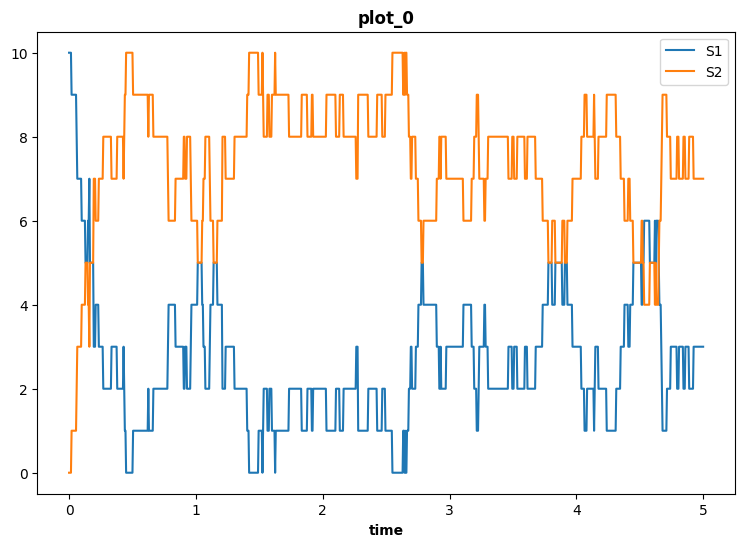

,S1,S2
0,2.5,7.5


In [44]:
execute(phrasedml_str)

# Display Names

In [45]:
def makeDisplayNameDct(sbml_path:str)->dict:
    """Finds the display names in a model.
       If an element does not have a display name, its element id is used.

       Args:
           sbml_path - path to the SBML file
           element_ids - list of element ids

        Returns:
            dict:
                key: element_id
                value: display name
    """
    # Get the model
    document = libsbml.SBMLReader().readSBML(sbml_path)
    model = document.getModel()
    # Collect IDs from all element types
    element_types = [
        ('Species', model.getListOfSpecies()),
        ('Parameters', model.getListOfParameters()),
        ('Reactions', model.getListOfReactions()),
        ('Compartments', model.getListOfCompartments()),
        ('Functions', model.getListOfFunctionDefinitions()),
        ('Events', model.getListOfEvents())
    ]
    # Find the element names if they exist
    result_dct = {}
    for type_name, element_list in element_types:
        for i in range(element_list.size()):
            element = element_list.get(i)
            element_id = element.getId()
            element_name = element.getName() if element.isSetName() else element_id
            result_dct[element_id] = element_name
    #
    return result_dct

# TESTS
dct = makeDisplayNameDct(SBML_FILE)
dct

{'S1': 'species 1',
 'S2': 'S2',
 'k1': 'k1',
 '_J0': '_J0',
 'default_compartment': 'default_compartment'}

In [46]:
!cat /tmp/ss_bug.xml

<?xml version="1.0" encoding="UTF-8"?>
<!-- Created by libAntimony version v2.15.0 with libSBML version 5.20.2. -->
<sbml xmlns="http://www.sbml.org/sbml/level3/version2/core" level="3" version="2">
  <model metaid="myModel" id="myModel">
    <listOfCompartments>
      <compartment sboTerm="SBO:0000410" id="default_compartment" spatialDimensions="3" size="1" constant="true"/>
    </listOfCompartments>
    <listOfSpecies>
      <species id="S1" name="species 1" compartment="default_compartment" initialConcentration="10" hasOnlySubstanceUnits="false" boundaryCondition="false" constant="false"/>
      <species id="S2" compartment="default_compartment" initialConcentration="0" hasOnlySubstanceUnits="false" boundaryCondition="false" constant="false"/>
    </listOfSpecies>
    <listOfParameters>
      <parameter id="k1" value="0.1" constant="true"/>
    </listOfParameters>
    <listOfReactions>
      <reaction id="_J0" reversible="true">
        <listOfReactants>
          <speciesReference 

# Notes

1. To execute sedml in Tellurium, need to put the model in an SBML format in a file in a specified working directory.
2. It may be that some part of the sedml workflow fails if the model file has multiple models, that the last model is selected.